### Part 1 Topic Classification

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

#Load the data:
df=pd.read_csv("dataset.tsv",sep="\t")
print(df.shape)
df.head()

#Combine all Song Info into a "Document"
df['document'] = df[['artist_name', 'track_name', 'release_date', 'genre', 'lyrics']].astype(str).agg(' '.join, axis=1)
df['document'].head()



(1500, 6)


0    loving the not real lake 2016 rock awake know ...
1    incubus into the summer 2019 rock shouldn summ...
2    reignwolf hardcore 2016 blues lose deep catch ...
3    tedeschi trucks band anyhow 2016 blues run bit...
4    lukas nelson and promise of the real if i star...
Name: document, dtype: object

In [2]:
# Drop duplicates and missing values
df = df.drop_duplicates()
df = df.dropna()
print(df.info())
print(df.shape)



<class 'pandas.core.frame.DataFrame'>
Index: 1480 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist_name   1480 non-null   object
 1   track_name    1480 non-null   object
 2   release_date  1480 non-null   int64 
 3   genre         1480 non-null   object
 4   lyrics        1480 non-null   object
 5   topic         1480 non-null   object
 6   document      1480 non-null   object
dtypes: int64(1), object(6)
memory usage: 92.5+ KB
None
(1480, 7)


### Part1 Q1

1.The original regex `r"[^\w\s]"` removed useful characters such as apostrophes (`'`).
In this lyris project,only remove specific punctuation while retaining word elements like $, #, and ' that may be meaningful.
In this case, we will use  text = re.sub(r'[^\w\s\']', '', text) to do so.This code removes all characters that are not alphanumeric, whitespace, or apostrophes, and is commonly used for text cleaning.

2.Original Issue:The evaluation was initially based on a single train-test split, which may lead to high variance in performance estimates due to data partitioning randomness.To fix this,I replaced the single split evaluation with 5-fold cross-validation (CV) using Scikit-learn in the below sections
These changes are incorporated in the later parts (Q2–Q5), and their effects are discussed along with the results.


### Part1 Q2 Text Preprocessing

In [3]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_val_score
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

#Set up stop_words and stemmer, lemmatizer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_v1(text):
    text = text.lower()
    text = re.sub(r'[^\w\s\']', '', text)
    tokens = word_tokenize(text)
    return ' '.join(tokens)
    
def preprocess_v2(text):
    text = text.lower()
    text = re.sub(r'[^\w\s\']', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

def preprocess_v3(text):
    text = text.lower()
    text = re.sub(r'[^\w\s\']', '', text)  # 保留 '
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

def preprocess_v4(text):
    text = text.lower()
    text = re.sub(r'[^\w\s\']', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

def preprocess_v5(text):
    text = text.lower()
    text = re.sub(r'[^\w\s\']', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [ps.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)


# Apply different preprocessing methods to the document and compare the results
preprocess_funcs = [preprocess_v1, preprocess_v2, preprocess_v3, preprocess_v4,preprocess_v5]


for i, func in enumerate(preprocess_funcs):
    print(f"\n=== Preprocessing v{i+1} ===")
    le = LabelEncoder()
    df['cleaned_doc'] = df['document'].apply(func)
    X = CountVectorizer().fit_transform(df['cleaned_doc'])
    y = le.fit_transform(df['topic'])
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    
    # BernoulliNB
    bnb = BernoulliNB()
    bnb.fit(X_train, y_train)
    y_pred_bnb = bnb.predict(X_test)
    print("🔹 BernoulliNB\n", classification_report(y_test, y_pred_bnb, target_names=le.classes_))
    
    # MultinomialNB
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    y_pred_mnb = mnb.predict(X_test)
    print("🔹 MultinomialNB\n", classification_report(y_test, y_pred_mnb, target_names=le.classes_))
    
    
    
    

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/davinagreen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davinagreen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/davinagreen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



=== Preprocessing v1 ===
🔹 BernoulliNB
               precision    recall  f1-score   support

        dark       0.51      0.82      0.63       118
     emotion       0.00      0.00      0.00        19
   lifestyle       0.00      0.00      0.00        41
    personal       0.67      0.24      0.36        90
     sadness       0.47      0.63      0.54       102

    accuracy                           0.49       370
   macro avg       0.33      0.34      0.30       370
weighted avg       0.45      0.49      0.43       370

🔹 MultinomialNB
               precision    recall  f1-score   support

        dark       0.82      0.80      0.81       118
     emotion       0.29      0.21      0.24        19
   lifestyle       0.84      0.66      0.74        41
    personal       0.80      0.87      0.83        90
     sadness       0.76      0.83      0.79       102

    accuracy                           0.78       370
   macro avg       0.70      0.67      0.68       370
weighted avg       

***Results comparison:***

In Q2,I experimented with five different text preprocessing routines in terms of BernoulliNB and MultinomialNB methods. The best-performing routine was preprocess_v3, with highest macro F1 score of 0.69 for MNB model and 0.33 for BNB model.This preprocess version includes the following steps: lowercasing, removing unnecessary punctuation marks, removing stopwords, and applying stemming using the Porter Stemmer. This combination yielded the highest performance record and was selected for use in the remaining parts of the assignment.

### Part1 Q3:Model Training and Evaluation Using Cross Validation Methods

,Metric,BNB,MNB
0,Accuracy,0.524324,0.785811
1,F1 (macro),0.337311,0.713379
2,Precision (macro),0.371429,0.753651
3,Recall (macro),0.378957,0.698874


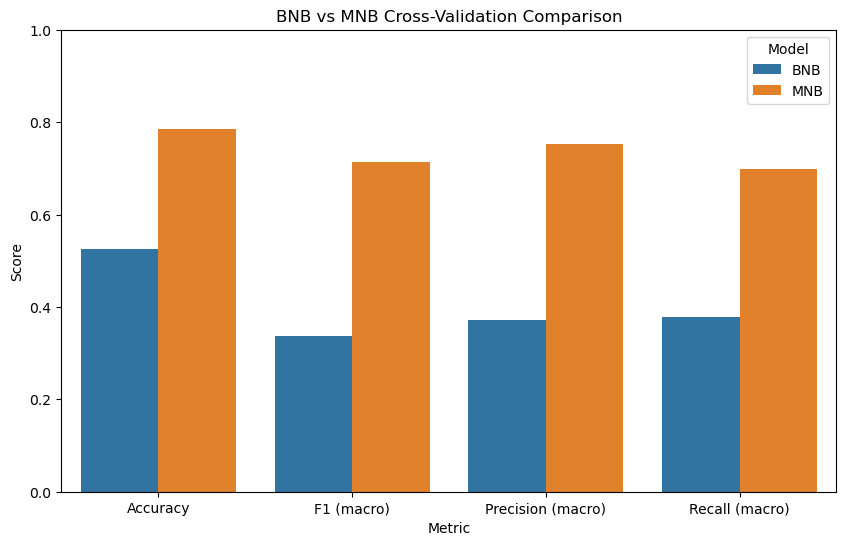

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Using reprocess_v3 as the standard reprocessing steps 
df['cleaned_doc'] = df['document'].apply(preprocess_v3)

#Set up evaluation metrics
metrics = {
    "Accuracy": "accuracy",
    "F1 (macro)": make_scorer(f1_score, average='macro'),
    "Precision (macro)": make_scorer(precision_score, average='macro', zero_division=0),
    "Recall (macro)": make_scorer(recall_score, average='macro', zero_division=0)
}

#Train models using 5-fold cross validation
vectorizer = CountVectorizer()
le=LabelEncoder()
X = vectorizer.fit_transform(df['cleaned_doc'])
y = le.fit_transform(df['topic'])

bnb = BernoulliNB()
mnb = MultinomialNB()

results = []
for metric_name, scorer in metrics.items():
    bnb_score = cross_val_score(bnb, X, y, cv=5, scoring=scorer).mean()
    mnb_score = cross_val_score(mnb, X, y, cv=5, scoring=scorer).mean()
    results.append([metric_name, bnb_score, mnb_score])

#Result display
results_df = pd.DataFrame(results, columns=["Metric", "BNB", "MNB"])
display(results_df)

results_df_melted = results_df.melt(id_vars="Metric", var_name="Model", value_name="Score")
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df_melted, x="Metric", y="Score", hue="Model")
plt.title("BNB vs MNB Cross-Validation Comparison")
plt.ylim(0, 1.0) #scale pillar graph
plt.show()


### Cross-Validation Comparison of BNB and MNB

In Q3,I performed 5-fold cross-validation using `CountVectorizer` on preprocessed song documents to evaluate the overall performance of BernoulliNB and MultinomialNB. I computed the following classification metrics as our evaluation metrics: accuracy, macro-averaged precision, recall, and F1-score.

The topic distribution shows the dataset has class imbalance issue, the number of " emotion" class is significantly less than other classes. Therefore, macro-averaged F1 was chosen as the main metric.
Trade-offs between metrics:
- Accuracy can be misleading for imbalanced data.
- Macro-averaged F1 computes the F1 independently for each class, which places equal importance to minority classes.
- Macro-averaged F1 also balances both precision and recall, providing a good overall metric.

Results:As shown in the table and plot above, the MultinomialNB model consistently outperforms BernoulliNB across all metrics,Mnb achieved 0.713379,while BNB only achieved 0.337311 in F1 score. We conclude that MultinomialNB is more suitable for this task and will use it in the rest of the assignment.


### Part1 Q4 Comparison of Different Max Features

,max_features,BNB_f1,MNB_f1
0,100,0.498613,0.735225
1,200,0.518576,0.809506
2,250,0.532292,0.831089
3,300,0.544217,0.846492
4,350,0.561938,0.843962
5,400,0.558412,0.842435
6,450,0.559038,0.834028
7,500,0.562119,0.833848
8,700,0.547012,0.829694
9,1000,0.529051,0.809044


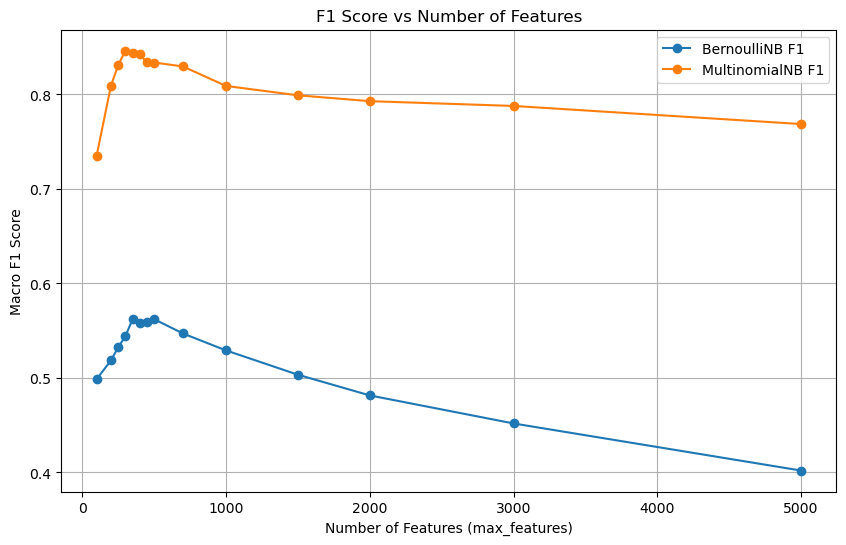

In [5]:
# Define max_features range
feature_counts = [100,200,250, 300,350,400, 450,500, 700, 1000, 1500, 2000, 3000, 5000]
results = []

#Compute macro F1 score on different max features.
for n in feature_counts:
    vectorizer = CountVectorizer(max_features=n)
    X = vectorizer.fit_transform(df['cleaned_doc'])   
    bnb_score = cross_val_score(bnb, X, y, cv=5, scoring='f1_macro').mean()
    mnb_score = cross_val_score(mnb, X, y, cv=5, scoring='f1_macro').mean()
    
    results.append([n, bnb_score, mnb_score])

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["max_features", "BNB_f1", "MNB_f1"])
display(results_df)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(results_df["max_features"], results_df["BNB_f1"], label="BernoulliNB F1", marker='o')
plt.plot(results_df["max_features"], results_df["MNB_f1"], label="MultinomialNB F1", marker='o')
plt.xlabel("Number of Features (max_features)")
plt.ylabel("Macro F1 Score")
plt.title("F1 Score vs Number of Features")
plt.legend()
plt.grid(True)
plt.show()


In Q4, we found that the MNB model achieved its highest macro F1 score of 0.8464 at max_features = 300, after which it declined slightly. The macro F1 score for BNB peaked at 0.5621 when max_features = 500 before dropping modestly. Therefore, we selected an optimal vocabulary size of 400, as this setting delivers near-peak performance for both classifiers while maintaining stability.

### Part1 Q5 Introduce Logistic Regression Method

Logistic Regression is a linear model that predicts class membership probabilities by applying the logistic (sigmoid) function to a weighted sum of input features.  and often be used in for multiclass. Logistic Regression is especially well-suited for high-dimensional, sparse datasets like text, making it a strong candidate for topic classification based on lyrics. Regularization (L1 or L2) can be tuned through the inverse penalty parameter C to prevent overfitting, and a variety of solvers (e.g. ‘liblinear’, ‘saga’) ensure efficient training even on large vocabularies. Because of its interpretability, robustness, and consistently strong performance in NLP benchmarks, Logistic Regression is a popular and reliable choice for topic classification in lyric-based datasets.

### Experiment 1:Model Comparison Under Baseline Settings

To determine the best-performing model, we compare three baseline classifiers—BernoulliNB, MultinomialNB, and Logistic Regression, by using the same preprocessing routine (preprocess_v3), the default model hyperparameters, and the default number of features in the CountVectorizer (i.e., no max_features limit). We also use a single training-test split for a controlled comparison.

In this baseline scenario, we hypothesize that Logistic Regression will outperform both Naive Bayes models (BNB and MNB) in terms of macro-averaged F1 score. This is because Logistic Regression does not rely on the strong conditional independence assumption that Naive Bayes does, and it can better capture feature interactions through learned weights.

The results below confirmed this hypothesis:
-Logistic Regression achieves a macro F1 score of 0.86, accuracy of 0.88, recall of 0.84, and precision of 0.89, strongly outperforming both MNB and BNB.
-MultinomialNB achieves a macro F1 score of 0.69,accuracy of 0.78, recall of 0.68, and precision of 0.70.
-BernoulliNB performs the worst, with a macro F1 score of only 0.33,accuracy of 0.51, recall of 0.36, and precision of 0.40.
These results highlight the robustness of Logistic Regression in handling text classification tasks even without hyperparameter tuning.



In [6]:
#Baseline Model Comparison

from sklearn.linear_model import LogisticRegression

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_doc'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    
# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print("🔹 BernoulliNB\n", classification_report(y_test, y_pred_bnb, target_names=le.classes_))

# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print("🔹 MultinomialNB\n", classification_report(y_test, y_pred_mnb, target_names=le.classes_))

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("🔹 Lr\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))
    

🔹 BernoulliNB
               precision    recall  f1-score   support

        dark       0.52      0.80      0.63       118
     emotion       0.00      0.00      0.00        19
   lifestyle       0.29      0.05      0.08        41
    personal       0.74      0.26      0.38        90
     sadness       0.47      0.68      0.55       102

    accuracy                           0.51       370
   macro avg       0.40      0.36      0.33       370
weighted avg       0.51      0.51      0.45       370

🔹 MultinomialNB
               precision    recall  f1-score   support

        dark       0.79      0.84      0.81       118
     emotion       0.29      0.21      0.24        19
   lifestyle       0.83      0.71      0.76        41
    personal       0.86      0.86      0.86        90
     sadness       0.75      0.78      0.77       102

    accuracy                           0.78       370
   macro avg       0.70      0.68      0.69       370
weighted avg       0.78      0.78      0.78  

### Experiment2:Model Comparison Using Cross validation and Hyperparameter Tuning

Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Macro F1 Score: 0.8599690526580257


,Metric,BNB,MNB,LR
0,Accuracy,0.648649,0.860135,0.877703
1,F1 (macro),0.558412,0.842435,0.859969
2,Precision (macro),0.576227,0.843920,0.883627
3,Recall (macro),0.554789,0.843070,0.844904


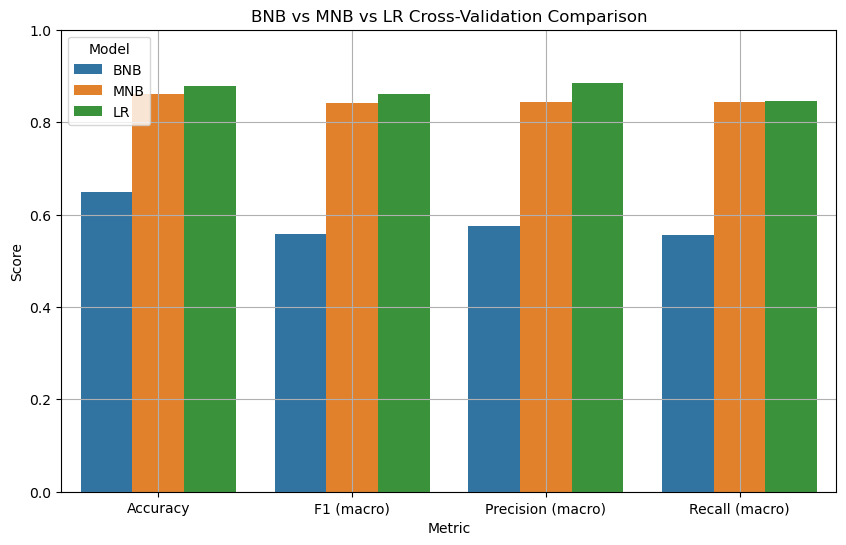

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vectorize using best setting from Q4
best_vectorizer = CountVectorizer(max_features=400)
X = best_vectorizer.fit_transform(df['cleaned_doc'])


# Models
bnb = BernoulliNB()
mnb = MultinomialNB()
lr = LogisticRegression(max_iter=1000,
                       )

#Metrics
metrics = {
    "Accuracy": "accuracy",
    "F1 (macro)": make_scorer(f1_score, average='macro'),
    "Precision (macro)": make_scorer(precision_score, average='macro', zero_division=0),
    "Recall (macro)": make_scorer(recall_score, average='macro', zero_division=0)
}

#Using GridSearch to find the best performed parameters for Logistic Regression model
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']  # safest choice
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring='f1_macro', cv=5)
grid.fit(X, y)

print("Best Params:", grid.best_params_)
print("Best Macro F1 Score:", grid.best_score_)

best_lr = grid.best_estimator_

results = []

for metric_name, scorer in metrics.items():
    bnb_score = cross_val_score(BernoulliNB(), X, y, cv=5, scoring=scorer).mean()
    mnb_score = cross_val_score(MultinomialNB(), X, y, cv=5, scoring=scorer).mean()
    lr_score = cross_val_score(best_lr, X, y, cv=5, scoring=scorer).mean()
    
    results.append([metric_name, bnb_score, mnb_score, lr_score])

results_df = pd.DataFrame(results, columns=["Metric", "BNB", "MNB", "LR"])
results_df_melted = results_df.melt(id_vars="Metric", var_name="Model", value_name="Score")

display(results_df)

plt.figure(figsize=(10,6))
sns.barplot(data=results_df_melted, x="Metric", y="Score", hue="Model")
plt.title("BNB vs MNB vs LR Cross-Validation Comparison")
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()


In the above scenario, we move beyond the baseline by conducting a more advanced scenario. We applied GridSearchCV to tune the hyperparameters of the Logistic Regression model. The best-performing configuration was found to be:C = 0.1, penalty = 'l2', solver = 'liblinear'.
Using these optimal parameters, we re-evaluated Logistic Regression against the best-performing versions of BernoulliNB and MultinomialNB, using cross-validation and 400 top features (as determined in Q4). The results are summarized as follows:

-Logistic Regression achieved the highest performance, with a macro F1 score of 0.86, outperforming both MultinomialNB (0.8424) and BernoulliNB (0.5584).In terms of accuracy and macro precision, Logistic Regression also led all models.
-Logistic Regression slightly outperformed MNB in macro recall (0.8449 vs. 0.8430), though the margin was negligible.

Overall, the ranking of models based on macro F1 and overall metrics is:Logistic Regression > MultinomialNB > BernoulliNB

These findings support our hypothesis that Logistic Regression, when properly tuned and used cross validation, is better suited for topic classification tasks in this dataset due to its flexibility and ability to model feature interactions effectively.

### Part 2 Recommendation Methods

In [8]:
#Creating user3 profile
import pandas as pd

data = {
    "topic": ["dark", "emotion", "lifestyle", "personal", "sadness"],
    "keywords": [
        "night, evil, shadow, black",
        "feel, heart, happy, love, pain",
        "party, rich, drink, fashion",
        "me, life, journey, self, dream",
        "alone, lost, cold, tears, cry"
    ]
}

user3_df = pd.DataFrame(data)

# Save as user3.tsv
user3_df.to_csv("user3.tsv", sep="\t", index=False)


### Part2 Q1 

In [19]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords
nltk.download('stopwords')


#split the dataset and set up user files
train_df = df.iloc[:750].copy()
test_df = df.iloc[750:1000].copy()
user_files = {
    "user1": "user1.tsv",
    "user2": "user2.tsv",
    "user3": "user3.tsv"
}

#  Build up LogisticRegression Classifier using CountVectorizer(max_features=400)  

cv = CountVectorizer(max_features=400)
X_train_counts = cv.fit_transform(train_df['cleaned_doc'])
y_train = train_df['topic']

clf = LogisticRegression(max_iter=1000, solver='liblinear', C=grid.best_params_['C'])
clf.fit(X_train_counts, y_train)



# Predict topics on the training set and collect the cleaned_doc texts by predicted topic
train_df['predicted_topic'] = clf.predict(X_train_counts)
topics = train_df['predicted_topic'].unique()

topic_docs = {
    topic: train_df.loc[train_df['predicted_topic']==topic, 'cleaned_doc'].tolist()
    for topic in topics
}

#Construct a stopwords set for some meaningless words
extra_stop = {'na','yeah','know','go',"2016"}
my_stop = stopwords.words('english') + list(extra_stop)

# Fit a separate TfidfVectorizer for each topic
tfidf_vectorizers = {}
for topic, docs in topic_docs.items():
    tv = TfidfVectorizer(stop_words=my_stop,
    min_df=5)
    tv.fit(docs)
    tfidf_vectorizers[topic] = tv

# read users tsv files and put them into a user_profiles
user_profiles = {}
for user_label in ['user1', 'user2', 'user3']:
    user_profiles[user_label] = pd.read_csv(f"{user_label}.tsv", sep="\t")

# Build a profile for each user and each topic and output the top 20 keywords
for user_label, udf in user_profiles.items():
    print(f"\n= {user_label.upper()} PROFILE =")
    for k, row in udf.iterrows():
        topic = row['topic']
        keywords = [kw.strip() for kw in row['keywords'].split(',')]
        pattern = "|".join(keywords) #Build up a pattern that contains all keywords for each topics for each user
        ## Find all songs under that topic whose cleaned_doc contains any of the keywords
        mask = (
            (train_df['predicted_topic'] == topic)
            & (train_df['cleaned_doc'].str.contains(pattern, case=False, regex=True))
        )
        selected_docs = train_df.loc[mask, 'cleaned_doc'].tolist()
        if not selected_docs:
            print(f"-- {topic}: no matching songs")
            continue

        # Combine into a single "big document" and use the corresponding TfidfVectorizer to obtain the profile vector
        big_doc = " ".join(selected_docs)
        tv = tfidf_vectorizers[topic]
        vec = tv.transform([big_doc]).toarray().ravel()# This step maps the big_doc into the TF–IDF vector space for that topic
    

        # Input the top 20 words
        feature_names = tv.get_feature_names_out()
        top_idxs = np.argsort(vec)[::-1][:20]
        top_terms = [feature_names[i] for i in top_idxs] 
        print(f"-- {topic}: {top_terms}")



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davinagreen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



= USER1 PROFILE =
-- dark: ['fight', 'black', 'blood', 'grind', 'like', 'come', 'stand', 'tell', 'gon', 'kill', 'hand', 'follow', 'light', 'true', 'head', 'good', 'peopl', 'caus', 'build', 'right']
-- sadness: ['think', 'leav', 'place', 'want', 'blame', 'hold', 'word', 'chang', 'mind', 'caus', 'trust', 'space', 'away', 'dream', 'tell', 'bend', 'fill', 'fail', 'choke', 'end']
-- personal: ['life', 'live', 'chang', 'world', 'dream', 'thank', 'wan', 'like', 'teach', 'lord', 'come', 'time', 'beat', 'thing', 'think', 'learn', 'need', 'right', 'want', 'promis']
-- lifestyle: ['tonight', 'night', 'song', 'come', 'time', 'sing', 'home', 'long', 'wait', 'wan', 'tire', 'right', 'play', 'mind', 'like', 'babi', 'stay', 'lose', 'girl', 'feel']
-- emotion: ['good', 'feel', 'hold', 'want', 'kiss', 'look', 'babi', 'caus', 'lip', 'real', 'time', 'right', 'light', 'like', 'heart', 'wan', 'gon', 'life', 'come', 'mind']

= USER2 PROFILE =
-- sadness: ['open', 'smile', 'tear', 'eye', 'away', 'come', 'lone

### Comment
These profiles look reasonable. I used custom stop-words and min_df=5 to prune out most of the noise—words such as “na” and “yeah”, "go" and "know". The resulting keyword lists fit each user and topic well.

For examples, in terms of User 3’s profile,the dark theme is captured by terms like 'black', 'evil', 'devil', 'come', 'fight', 'blood', which clearly reflect a darker mood. Under sadness, words such as 'break', 'cold', 'fall', 'heart', 'hurt' convey loss and regret. The personal topic includes “dream,” 'believ' 'teach' and “need,” stand for introspection, while 'countri', 'tonight', 'drink' represent everyday or nightlife lifestyles. Finally, the emotion category is well represented by “heart,” “kiss,” “feel,” and “night,” which strongly reflect affective content.

For User 2’s profile:
Under sadness, terms like “tear,” “lone,” “hard,” “road,” and “away” give a clear sense of sorrow or struggle. The emotion list is dominated by affective words such as “hold,” “kiss,” and “feel,” 'rememb'.

Overall, these keyword lists are semantically coherent and align well with their intended themes.


### Part2 Q2

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import re
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# 1. Split train/test
train_df = df.iloc[:750].reset_index(drop=True)
test_df  = df.iloc[750:1000].reset_index(drop=True)

# 2. Train Part-1 classifier
le = LabelEncoder()
y_train = le.fit_transform(train_df['topic'])
cv = CountVectorizer(max_features=400)
X_train = cv.fit_transform(train_df['cleaned_doc'])
clf = LogisticRegression(max_iter=1000, solver='liblinear', C=1)
clf.fit(X_train, y_train)

train_df['predicted_topic'] = le.inverse_transform(
    clf.predict(cv.transform(train_df['cleaned_doc']))
)
test_df['predicted_topic'] = le.inverse_transform(
    clf.predict(cv.transform(test_df['cleaned_doc']))
)

# 3. Fit TF–IDF on the training set for each topic
tfidf_vecs = {}
for topic in train_df['predicted_topic'].unique():
    docs = train_df.loc[train_df['predicted_topic']==topic, 'cleaned_doc']
    tv = TfidfVectorizer()
    tv.fit(docs)
    tfidf_vecs[topic] = tv

# 4. Load user profiles
user_kw_map = {}
for u in ['user1','user2','user3']:
    df_u = pd.read_csv(f"{u}.tsv", sep="\t")
    user_kw_map[u] = {
        row['topic']: [kw.strip() for kw in row['keywords'].split(',')]
        for _, row in df_u.iterrows()
    }

# 5. Profile builder
def make_profile_vec(user_keyword_map, topic, M=None):
    # Get the list of keywords for this topic
    if topic in user_keyword_map:
        keyword_list = user_keyword_map[topic]
    else:
        keyword_list = []
    
    # If there are no keywords, return a zero vector of the correct length
    feature_names = tfidf_vecs[topic].get_feature_names_out()
    vector_length = len(feature_names)
    if not keyword_list:
        return np.zeros(vector_length)
    
    # Find all training documents for this topic that contain any keyword
    selected_docs = []
    for i in range(len(train_df)):
        if train_df.loc[i, 'predicted_topic'] == topic:
            text = train_df.loc[i, 'cleaned_doc']
            # Check each keyword
            for kw in keyword_list:
                if re.search(r'\b' + kw + r'\b', text, re.IGNORECASE):
                    selected_docs.append(text)
                    break  # move to the next document
    
    # Combine selected documents into one big string
    big_doc = " ".join(selected_docs)
    
    # Transform the big document into the TF–IDF vector space
    tfidf_vector = tfidf_vecs[topic].transform([big_doc]).toarray()[0]
    
    # If M is specified and smaller than the vector length, keep only the top M entries
    if M is not None and M < len(tfidf_vector):
        # Get indices of top M values
        sorted_indices = np.argsort(tfidf_vector)[::-1]
        top_m_indices = sorted_indices[:M]
        # Create a new vector with only those top M values
        truncated_vector = np.zeros_like(tfidf_vector)
        for idx in top_m_indices:
            truncated_vector[idx] = tfidf_vector[idx]
        return truncated_vector
    
    # Otherwise return the full vector
    return tfidf_vector

# 6. Evaluate Cosine, Jaccard, Euclidean
results = []
N = 20
Ms = [10, 20, None]
algs = ['cosine', 'jaccard', 'euclidean']

for user_label in ['user1','user2','user3']:
    u_map = user_kw_map[user_label]
    # ground-truth for recall
    gt_mask = []
    for doc, topic in zip(test_df['cleaned_doc'], test_df['predicted_topic']):
        kws = u_map.get(topic, [])
        if not kws:
            gt_mask.append(False)
        else:
            gt_mask.append(bool(re.search("|".join(kws), doc, re.I)))
    total_pos = sum(gt_mask)

    for M in Ms:
        # build per-topic profile vectors
        profs = {t: make_profile_vec(u_map, t, M) for t in tfidf_vecs}

        # score each song
        scores = {alg: [] for alg in algs}
        for doc, topic in zip(test_df['cleaned_doc'], test_df['predicted_topic']):
            song_vec = tfidf_vecs[topic].transform([doc]).toarray().ravel()
            prof_vec = profs[topic]

            # cosine
            cos_sc = cosine_similarity([song_vec],[prof_vec])[0,0] if prof_vec.any() else 0
            scores['cosine'].append(cos_sc)

            # jaccard on sets
            kw_set = set(u_map.get(topic, []) if M is None else u_map.get(topic, [])[:M])
            doc_set = set(doc.split())
            inter = len(kw_set & doc_set)
            union = len(kw_set | doc_set)
            jaccard_sc = inter/union if union else 0
            scores['jaccard'].append(jaccard_sc)

            # euclidean similarity = 1/(1+dist)
            dist = np.linalg.norm(song_vec - prof_vec)
            euclid_sc = 1/(1+dist)
            scores['euclidean'].append(euclid_sc)

        # compute metrics
        for alg in algs:
            top_idxs = np.argsort(scores[alg])[::-1][:N]
            tp = sum(gt_mask[i] for i in top_idxs)
            prec = tp/N
            rec  = tp/total_pos if total_pos>0 else 0
            f1   = 2*prec*rec/(prec+rec) if (prec+rec)>0 else 0
            results.append({
                'user': user_label,
                'algorithm': alg,
                'M': M or 'all',
                'Precision@20': round(prec,3),
                'Recall@20':    round(rec,3),
                'F1@20':        round(f1,3)
            })

# 7. Show result
results_df = pd.DataFrame(results)
print(
    results_df
      .pivot_table(
         index=['user','algorithm','M'],
         values=['Precision@20','Recall@20','F1@20']
      )
      .sort_index()
)


                     F1@20  Precision@20  Recall@20
user  algorithm M                                  
user1 cosine    10   0.351          0.85      0.221
                20   0.371          0.90      0.234
                all  0.392          0.95      0.247
      euclidean 10   0.351          0.85      0.221
                20   0.351          0.85      0.221
                all  0.392          0.95      0.247
      jaccard   10   0.412          1.00      0.260
                20   0.412          1.00      0.260
                all  0.412          1.00      0.260
user2 cosine    10   0.083          0.05      0.250
                20   0.083          0.05      0.250
                all  0.167          0.10      0.500
      euclidean 10   0.000          0.00      0.000
                20   0.000          0.00      0.000
                all  0.000          0.00      0.000
      jaccard   10   0.333          0.20      1.000
                20   0.333          0.20      1.000
            

### Evaluation Metrics：
To assess how well the recommender retrieves songs the user “likes,” we use:
-Precision: the fraction of the N recommendations that truly match the user’s interests.
-Recall: the fraction of all “likeable” songs in Week 4 that appear in the top N recommendations.
-F1 score: the harmonic mean of Precision and Recall.

### Choice of N：
We display N = 20 songs in total. This provides enough variety to cover multiple themes without overwhelming the user, and represents a realistic playlist length for initial feedback.

### Profile Size (M) Tested：
M = 10 : top 10 TF–IDF keywords per topic
M = 20 : top 20 TF–IDF keywords per topic
all : no truncation (use every keyword in the TF–IDF vocabulary)

### Methods and Results:
We used three matching algorithms—cosine similarity and euclidean and jaccard to compare performance across different profile sizes M. For cosine similarity and euclidean, performance steadily improved as more keywords were included, with the full set yielding the highest precision, recall, and F1 scores for user 1 and user2; For user 3, euclidean method show worse when M increase.This is because Euclidean similarity is highly sensitive to vector length and noise: adding more low-weight TF–IDF dimensions (larger M) inflates the distance between profile and song vectors. As a result, the 1∕(1+distance) score decreases, lowering precision and recall
In contrast, the jaccard method produced identical precision, recall, and F1 scores regardless of M, since each profile contained at most 20 terms. For User 1, Users 2 and 3, jaccard clearly outperformed cosine similarity and euclidean across all metrics, achieved the highest precision of 1.

Recall and F1 were relatively low in the offline simulation, because we treated every song containing any profile keyword as a positive instance and there may have been dozens or even hundreds of such matches, yet we only recommended N=20 songs. Since recall is equal to true positives/ total positives, this limitation causes a large denominator inevitably produced a low recall (and thus a low F1). Therefore, we will use precision as our primary evaluation metric and conduct this in Part3.

Nevertheless, user 2’s precision was particularly low because their profile covered only two of the five topics (sadness and emotion). For the three topics where User 2 had no keywords, every song was treated as a non-match by default. The lack of profile completeness has driven precision down.

### Final Recommendation:

Algorithm: jaccard (simpler, consistently higher F1)
Profile size: all keywords
Number of recommendations: N = 20 songs total
This setup maximizes the chance that every recommended song contains at least one user-interest keyword (Precision=1.0 for user1 & 3), while keeping the implementation straightforward.


### Part3: User Evaluation

In [15]:
import pandas as pd
import numpy as np
import random
import re

# Set up seeds for reproducibility
random.seed(42)
np.random.seed(42)

# Split Week1–3 (train pools) and Week4 (test pool)
week1_pool = df.iloc[0:250].reset_index(drop=True)
week2_pool = df.iloc[250:500].reset_index(drop=True)
week3_pool = df.iloc[500:750].reset_index(drop=True)
test_pool  = df.iloc[750:1000].reset_index(drop=True)

N = 20  # number of songs shown per week

def get_feedback(pool, week_num):
    # Sample N songs and ask the user which ones they like
    sample = pool.sample(N).reset_index(drop=True)
    
    print("\nWeek {} songs:".format(week_num))
    for i in range(len(sample)):
        title = sample.loc[i, 'artist_name'] + " - " + sample.loc[i, 'track_name']
        print(str(i) + ": " + title)
    
    # Ask the user to enter comma-separated song numbers they like
    user_input = input("Enter the numbers of the songs you like, separated by commas: ")
    liked_strs = user_input.split(",")
    
    # Build a list of booleans for each song
    liked_flags = []
    for i in range(len(sample)):
        if str(i).strip() in liked_strs:
            liked_flags.append(True)
        else:
            liked_flags.append(False)
    
    # Add the 'liked' column to the DataFrame and return it
    sample['liked'] = liked_flags
    return sample


# 1. Collect feedback for Weeks 1–3
fb1 = get_feedback(week1_pool, 1)
fb2 = get_feedback(week2_pool, 2)
fb3 = get_feedback(week3_pool, 3)

# 2. Combine liked songs and build the global keyword set
liked_df = pd.concat([fb1[fb1['liked']], fb2[fb2['liked']], fb3[fb3['liked']]])
keywords = set()
for doc in liked_df['cleaned_doc']:
    keywords.update(re.findall(r"\b\w{4,}\b", doc))
keywords = list(keywords)
kw_set = set(keywords)

# 3. Define Jaccard scorer instead of overlap count
def compute_jaccard_score(doc):
    doc_set = set(doc.split())
    inter = len(kw_set & doc_set)
    union = len(kw_set | doc_set)
    return inter / union if union else 0

# 4. Score Week 4 songs
test_pool['jaccard_score'] = test_pool['cleaned_doc'].apply(compute_jaccard_score)

# 5. Pick top-N by Jaccard and preserve original indices
top_n = test_pool.sort_values('jaccard_score', ascending=False).head(N)
recommended_indices = top_n.index.tolist()      # original test_pool row numbers
recommendations = top_n.reset_index(drop=True)  # re‐indexed 0–19 for display

# 6. Display Week 4 recommendations and collect feedback
print("\nWeek 4 Recommendations:")
for i in range(len(recommendations)):
    artist = recommendations.loc[i, 'artist_name']
    track  = recommendations.loc[i, 'track_name']
    score  = recommendations.loc[i, 'jaccard_score']
    print(f"{i}: {artist} – {track}  (jaccard={score:.3f})")

user_input = input("Enter the numbers of the songs you like (0–19), separated by commas: ")
liked_numbers = user_input.split(",")
liked_flags = [str(i).strip() in liked_numbers for i in range(len(recommendations))]
recommendations['liked'] = liked_flags

# 7. Compute Precision@20 (and if desired, Recall@20/F1@20)
precision20 = recommendations['liked'].sum() / N
print(f"\nPrecision@{N} = {recommendations['liked'].sum()} / {N} = {precision20:.3f}")



Week 1 songs:
0: skool 77 - vivo hip hop (live)
1: rebelution - trap door
2: alec benjamin - outrunning karma
3: phish - we are come to outlive our brains
4: madeleine peyroux - shout sister shout
5: janiva magness - what i could do
6: eric ethridge - if you met me first
7: imagine dragons - natural
8: eli young band - never land
9: larkin poe - john the revelator
10: the movement - fair warning
11: adam jensen - marijuana breath
12: imagine dragons - bullet in a gun
13: jamie n commons - walls
14: 311 - dodging raindrops
15: cody jinks - i'm not the devil
16: michael franti & spearhead - my lord
17: rend collective - counting every blessing
18: the black keys - breaking down
19: t-rock - be a g about it


Enter the numbers of the songs you like, separated by commas:  1,3,4,5,6,7,9,12,13,14,17,18



Week 2 songs:
0: slightly stoopid - glocks
1: welshly arms - learn to let go
2: upchurch - spotlight
3: cole swindell - break up in the end
4: mark ronson - nothing breaks like a heart (feat. miley cyrus)
5: don philippe - the world connects
6: magic giant - window
7: ajmw - cushty
8: seckond chaynce - i miss you bae
9: sticky fingers - westway
10: mild high club - tesselation
11: jake owen - i was jack (you were diane)
12: high valley - dear life
13: eagles of death metal - high voltage / it's a long way to the top (if you wanna rock 'n' roll)
14: the blue stones - rolling with the punches
15: thievery corporation - music to make you stagger
16: tash sultana - free mind
17: crowder - all my hope
18: bishop briggs - white flag
19: jelly roll - when i get rich


Enter the numbers of the songs you like, separated by commas:  1,3,4,5,8,11,12,16,18,2,9



Week 3 songs:
0: protoje - camera show
1: ty segall - isolation
2: sam gendel - boa
3: gucci mane - i get the bag (feat. migos)
4: boogie belgique - every time
5: killswitch engage - unleashed
6: twenty one pilots - chlorine
7: death from above 1979 - all i c is u & me
8: uncle kracker - floatin'
9: adam doleac - solo
10: goodbye june - get happy
11: nahko and medicine for the people - runner
12: jamie n commons - low life
13: nick hakim - roller skates
14: bill charlap trio - there's a small hotel
15: kiefer - tubesocks
16: skarra mucci - the song
17: panic! at the disco - house of memories
18: seafret - wildfire
19: all them witches - rob's dream


Enter the numbers of the songs you like, separated by commas:  1,4,5,6,7,8,9,10,11,12,13,17,18,19



Week 4 Recommendations:
0: mike love – forgiveness  (jaccard=0.064)
1: soja – i can't stop dreaming  (jaccard=0.059)
2: alborosie – rocky road  (jaccard=0.058)
3: hunter hayes – still  (jaccard=0.056)
4: deca – donner bell  (jaccard=0.055)
5: the band steele – sit awhile  (jaccard=0.054)
6: timeflies – once in a while  (jaccard=0.054)
7: the dear hunter – the revival  (jaccard=0.052)
8: lil wayne – scared of the dark (feat. xxxtentacion)  (jaccard=0.052)
9: playboi carti – love hurts (feat. travis scott)  (jaccard=0.050)
10: lukas graham – 7 years  (jaccard=0.049)
11: axian – sunday morning  (jaccard=0.049)
12: the dear hunter – the flame (is gone)  (jaccard=0.048)
13: wallows – it's only right  (jaccard=0.047)
14: alec benjamin – boy in the bubble  (jaccard=0.046)
15: alessia cara – ready  (jaccard=0.046)
16: iya terra – follow your heart (feat. zion thompson from the green)  (jaccard=0.045)
17: post malone – blame it on me  (jaccard=0.045)
18: jason aldean – first time again  (jacca

Enter the numbers of the songs you like (0–19), separated by commas:  0,1,2,3,4,5,6,7,8,9,10,12,13,15



Precision@20 = 14 / 20 = 0.700


In [17]:
#Compute Precision Table

metrics = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1'],
    'Value':  [precision20, "not measured", "not measured"]
})

metrics

,Metric,Value
0,Precision,0.7
1,Recall,not measured
2,F1,not measured


### User Evaluation

I recruited a non-technical subject which is my friend Ann, and ran a 4-week simulation with N = 20 songs per week:  
1. During the Weeks 1–3 - the Training Phase, Ann will listen the following songs:
   - Week 1: 20 songs sampled from IDs 1–250,
   - Week 2: 20 songs sampled from IDs 251–500,   
   - Week 3: 20 songs sampled from IDs 501–750  
Ann listened and marked each song they liked.  
2. In week4, our model recommend Ann another 20 songs based on the analysis of the contents of the songs she liked in the past 3 weeks.
Ann liked 14 songs out of 20 of them. she suprisely found the system is recommending songs with her taste.her feedback is:> “Most of the top-20 list felt on-theme and I enjoyed 14 of them, but a few of my favorites never appeared because they lacked those specific keywords. I’d appreciate occasional ‘exploration’ tracks or using synonyms so the system can surface songs that feel similar even if the lyrics differ.” 

3. The above calculated metrics table shows that the precision is 0.7,which means 70% of the songs in the song recommendation list meets the test client's taste.
recall is 1 and f1 score are not measured, this is because recall is calculated based on the true positive(the songs Ann likes)/total positive(the song Ann likes out of week4's 250 songs), it is hard in reality  to collect a customer's total positive as it's very costly and time consumimg. In our scenario,  hence we prefer use precision as the evaluation metrics as it reflect how good the recemmendation system be able to recommend on content-based scenarios.


### Comparison to Part 2 Offline Results  
In Part 2 (user3 profile) we had the below result using the Jaccard algorithm:  :  
- **Precision** = 1 

In our live scenario the Precision@20 (0.70) is actually lower than part 2, reflecting real-user variability. This is because offline in Part 2 we treated every song that matched at least one profile keyword as “liked,” so by construction Jaccard gave us Precision = 1.0—none of the top-20 keyword-matching tracks were ever counted as “wrong.” In the live Part 3 study, however, a real person judged each recommendation, and people don’t follow our keyword rule perfectly and they skip some songs even though they contain their profile words, and they might like others that don’t.Therefore, it drags Precision down to 0.70 in practice.

### Concerns and future work
The main concern that we observed is that matching strictly on keywords gives high precision but not perfect coverage: it misses any song the user would enjoy that happens to use different wording, so recommendations can feel repetitive and safe. Relying only on lyrics also ignores melody, production and social signals that often drive taste, and with only a few “likes” the profile stays too narrow. In a real system you’d want to broaden the model by adding synonyms or embeddings, blending in collaborative signals, and occasionally injecting exploratory tracks to avoid that filter-bubble effect and enhance diversity.
